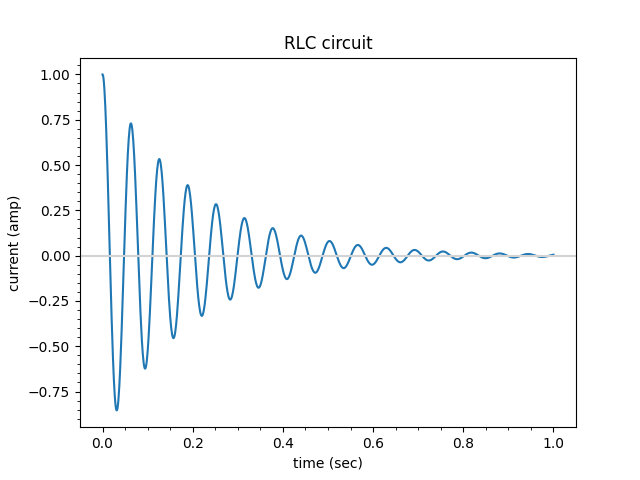

In [4]:
"""rlc_circuit.ipynb"""
# Cell 1


from __future__ import annotations

import typing

from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import solve_ivp  # type: ignore

if typing.TYPE_CHECKING:
    from typing import Any

    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget

def model(time: float,state_vector: tuple[float, float],R,L,C) -> tuple[float, float]:
    omega: float
    I: float
    omega, I = state_vector  # unpack dependent variables
    d_omega: float = -(R / L) * omega - (1 / (L * C)) * I
    d_I: float = omega
    return d_omega, d_I

def plot(ax: Axes) -> None:

    R = 0.1
    L = 0.01
    C = 0.01
    I0 = 1

    # current = lambda t : np.sin(omega * t) * (I0 / (omega*L)) * np.exp((-R / (2*L)) * t)

    # time = np.linspace(0,1,1000)
    # curr = current(time)

    sol: Any = solve_ivp(
        model,
        (0, 1),
        [0, I0],
        max_step=0.001,
        args=[R,L,C],
    )
    time_steps: NDArray[np.float_] = np.array(sol.t, dtype=np.float_)
    I_underdamped: NDArray[np.float_] = np.array(sol.y[1], dtype=np.float_)

    # fmt: off
    ax.plot(time_steps,I_underdamped)
    # fmt: on

    ax.set_title("RLC circuit")
    ax.set_xlabel("time (sec)")
    ax.set_ylabel("current (amp)")
    ax.axhline(y=0.0, color="lightgray")
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())


def main() -> None:
    plt.close("all")
    plt.figure(" ")
    plot(plt.axes())
    plt.show()


main()